In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
from scipy import stats
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

query1 = '''
SELECT
  *
FROM
  studentsperformance
'''

df = pd.read_sql_query(query1, con=engine)
engine.dispose()

We already know from doing EDA 2 assignment on this data that there are no missing values and that we have some outliers in the scores values.

In [4]:
# winsorize the data to eliminate outliers beyond the .05 bound

winsorized = df.copy()

for column in df.select_dtypes(include=['int64', 'float64', 'float']):
    winsorized[column] = winsorize(df[column], (.05, .05))

### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

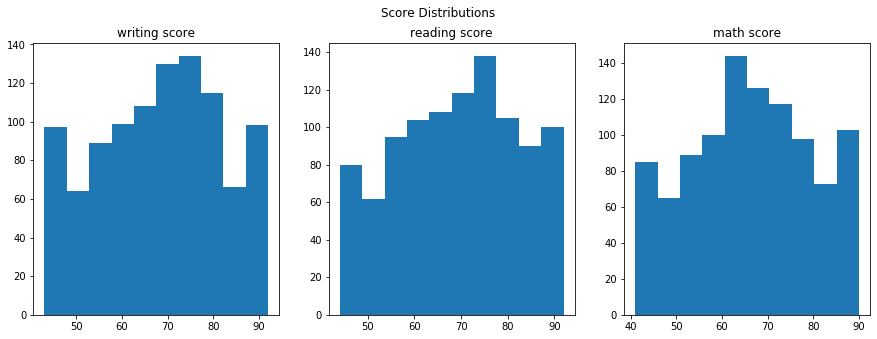

In [6]:
scores = ['writing score', 'reading score', 'math score']

plt.figure(figsize=(15,5))
plt.suptitle('Score Distributions')
for i, score in enumerate(scores):
    plt.subplot(1, 3, i+1)
    plt.hist(winsorized[score])
    plt.title(score)
plt.show()

In [30]:
for score in scores:
    print(score, '\n', '--------------------------------')
    print('Jarque-Bera results:')
    print('Statistic: {} | p-value: {}'.format(jarque_bera(winsorized[score])[0]
                                               , jarque_bera(winsorized[score])[1])
          , '\n')
    
    print('Normality test results:')
    print('Statistic: {} | p-value {}'.format(normaltest(winsorized[score])[0]
                                             ,normaltest(winsorized[score])[1])
         , '\n \n')

writing score 
 --------------------------------
Jarque-Bera results:
Statistic: 34.879974554257416 | p-value: 2.6663045993302603e-08 

Normality test results:
Statistic: 122.48839026158309 | p-value 2.523387841117695e-27 
 

reading score 
 --------------------------------
Jarque-Bera results:
Statistic: 33.41452980345038 | p-value: 5.547879833311953e-08 

Normality test results:
Statistic: 110.71476001696956 | p-value 9.09065821415846e-25 
 

math score 
 --------------------------------
Jarque-Bera results:
Statistic: 29.986391798325354 | p-value: 3.079908078573723e-07 

Normality test results:
Statistic: 98.50523527629237 | p-value 4.0724891925309584e-22 
 



Not normally distributed so we will apply a box-cox treatment

In [34]:
for score in scores:
    winsorized = pd.concat([winsorized, boxcox(winsorized[score])], axis=1)

TypeError: cannot concatenate object of type '<class 'tuple'>'; only Series and DataFrame objs are valid